In [50]:
from sklearn.datasets import make_regression
import numpy as np

In [51]:
x,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

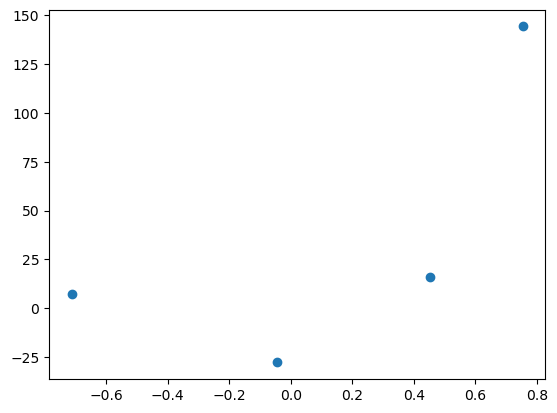

In [52]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

# checking the correct one

In [53]:
from sklearn.linear_model import LinearRegression as lr

In [54]:
reg = lr()
reg.fit(x,y)

LinearRegression()

In [55]:
print("m = ", reg.coef_)

m =  [78.35063668]


In [56]:
print("c = ", reg.intercept_)

c =  26.15963284313262


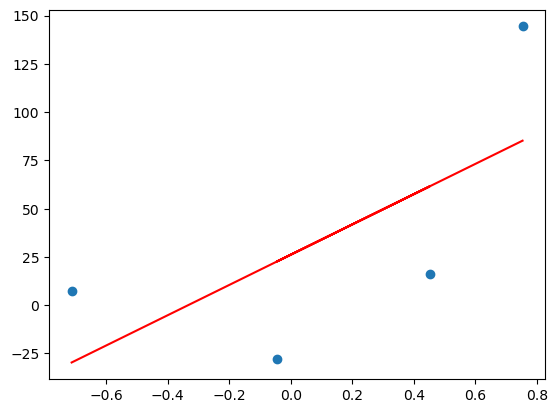

In [57]:
plt.scatter(x,y)
plt.plot(x, reg.predict(x), "r")

# my side

# just for b

[ 44.18419163 135.39949674  96.51318381 159.05759577]


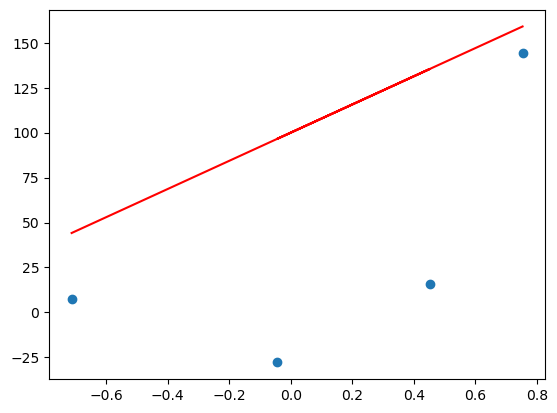

In [58]:
m = 78.35
b = 100
y_pred = ((m*x)+b).reshape(4)
print(y_pred)

plt.scatter(x,y)
plt.plot(x, y_pred, "r", label = "b = 100")
plt.show()

## good

In [59]:
## epochs 1 

b_slope = -2 * sum(y - m*x.reshape(4) - b) # without using reshape you also try to use .ravel()
b_slope

590.7223659179078

In [60]:
learning_rate = 0.1

b_new = b - (learning_rate * b_slope)

In [61]:
b_new

40.927763408209216

[ 44.18419163 135.39949674  96.51318381 159.05759577]


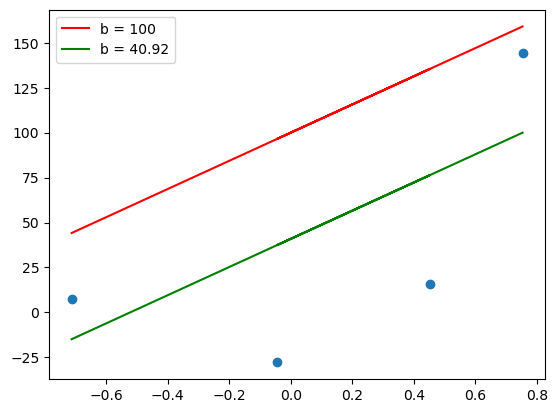

In [62]:
y_pred_new = ((m*x)+b_new).reshape(4)
print(y_pred)

plt.scatter(x,y)
plt.plot(x, y_pred, "r", label= 'b = 100')
plt.plot(x, y_pred_new, "g", label= 'b = 40.92')
plt.legend()
plt.show()

590.7223659179078
40.927763408209216
[-14.88804496  76.32726015  37.44094722  99.98535918]


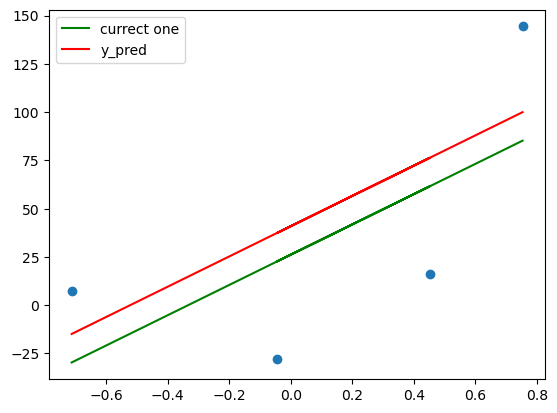

118.14447318358157
29.11331608985106
[-26.70249228  64.51281283  25.6264999   88.17091186]


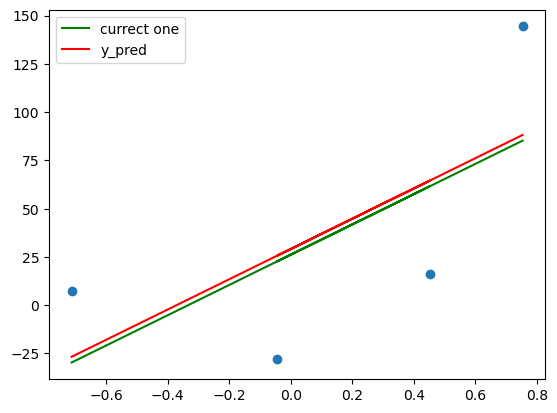

23.62889463671634
26.750426626179426
[-29.06538175  62.14992337  23.26361044  85.80802239]


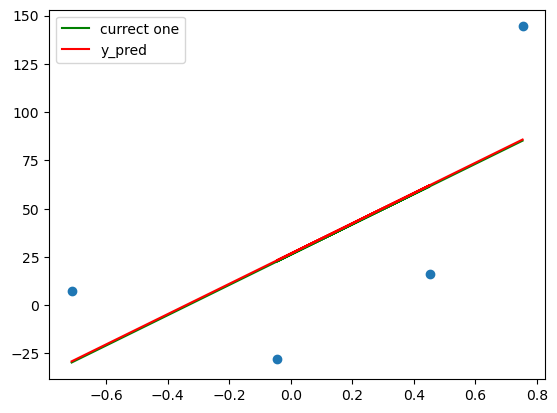

4.725778927343242
26.2778487334451
[-29.53795964  61.67734547  22.79103255  85.3354445 ]


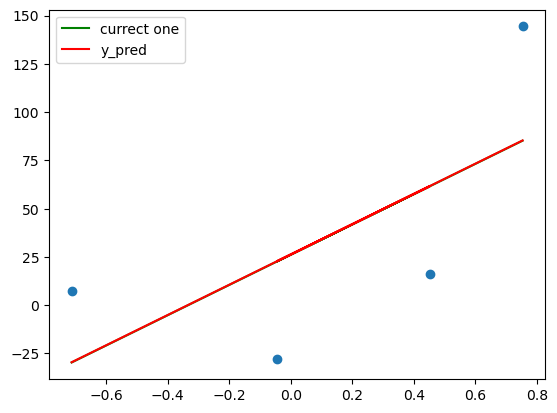

0.9451557854686428
26.183333154898236
[-29.63247522  61.5828299   22.69651697  85.24092892]


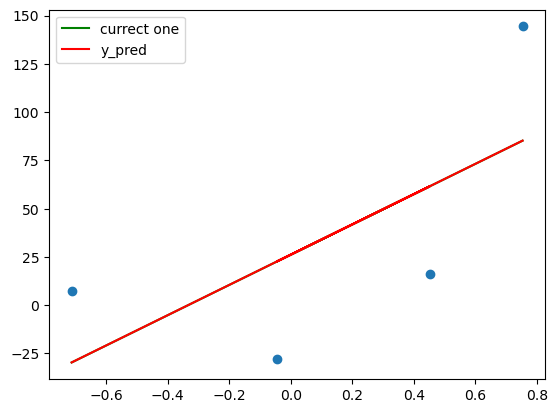

0.18903115709372287
26.164430039188865
[-29.65137833  61.56392678  22.67761385  85.22202581]


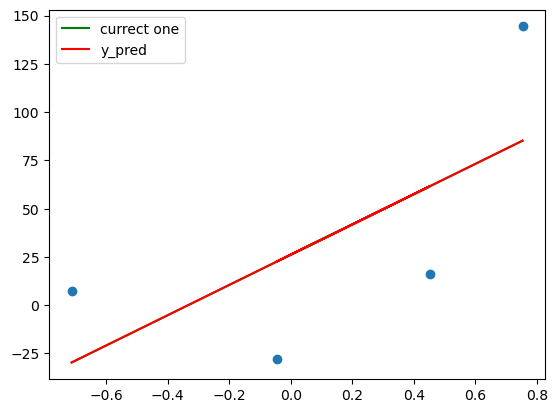

0.03780623141875594
26.16064941604699
[-29.65515896  61.56014616  22.67383323  85.21824518]


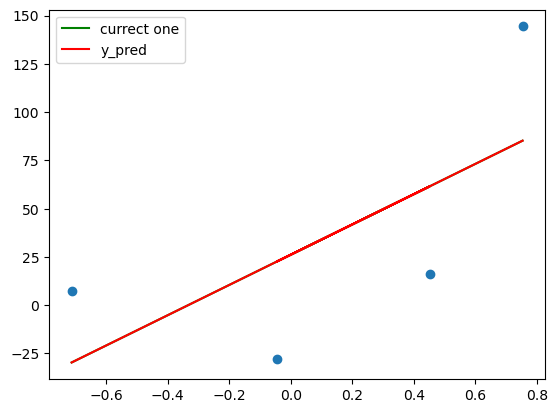

0.007561246283756873
26.159893291418616
[-29.65591508  61.55939003  22.6730771   85.21748906]


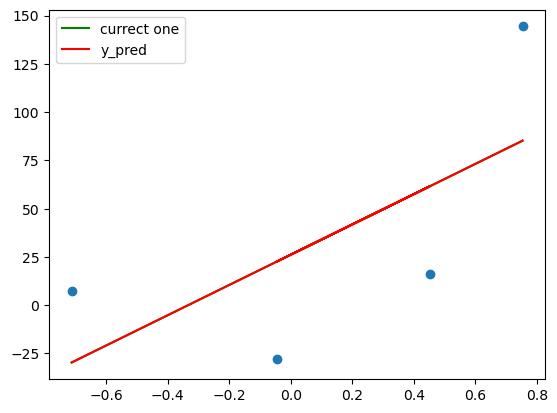

0.0015122492567627432
26.15974206649294
[-29.65606631  61.55923881  22.67292588  85.21733783]


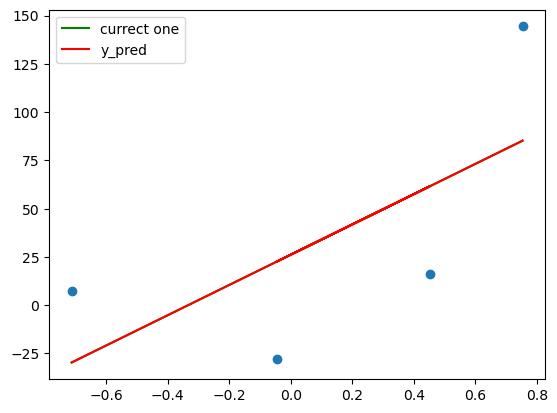

0.0003024498513468643
26.159711821507805
[-29.65609655  61.55920856  22.67289563  85.21730759]


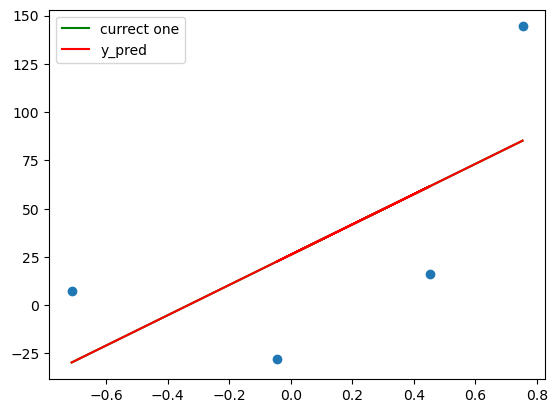

In [67]:
# epochs in loop

epochs = 10
b = 100

for i in range(epochs):
    b_slope = -2 * sum(y - m*x.reshape(4) - b) # without using reshape you also try to use .ravel()
    print(b_slope)
    
    learning_rate = 0.1
    b = b - (learning_rate * b_slope)
    
    print(b)
    y_pred = ((m*x)+b).reshape(4)
    print(y_pred)
    
    plt.scatter(x,y)
    plt.plot(x, reg.predict(x), "g", label= 'currect one')
    plt.plot(x, y_pred, "r", label= 'y_pred')
    plt.legend()
    plt.show()

## calculating m and b both together

In [72]:
class gd:
    def __init__(self, lr, epo):
        self.lr = lr
        self.epo = epo
    def give_m_and_b(self):
        b = 100
        m = 100
        for i in range(self.epo):
            b_slope = -2 * sum(y - m*x.reshape(4) - b)
            m_slope = -2 * sum(x.ravel() * (y - m*x.reshape(4) - b))
            
            b = b - (self.lr * b_slope)
            m = m - (self.lr * m_slope)
        return b, m

lr_gd = gd(0.1, 50)
b, m = lr_gd.give_m_and_b()

print(b, m)

26.15963136086807 78.3506458976668
